# 얼굴인식

매번 매뉴얼로 크롤링 사진을 전처리하다가 이제야, 드디어 여유가 생겨서 간단하게 얼굴인식 모델을 적용할 기회가 생겼다.  
사실 이거부터 만드는게 훨씬 빨랐을 텐데 그동안 얼마나 바쁘다고 이걸 만들 기회조차 없던걸까...  
얼굴인식API는 카카오, 네이버, 구글 등 성능좋은 API가 참 많기는 하지만 다들 무료횟수제한이란 벽이  커서 OpenCV를 오랜만에 다뤄볼겸 처음부터 작성해보고자 한다.  

## 1. haarcascades 파일 다운로드
- [이곳](https://github.com/opencv/opencv/tree/master/data/haarcascades)에서 다운로드
- 연습용으로 "haarcascade_frontalface_default.xml"를 사용함

In [1]:
import cv2
import numpy
from matplotlib import pyplot as plt

### 테스트) 음식사진 VS 사람사진
사진예시로는 경기 광주시의 "더이거차이나" 사장님이 포탈에 직접 업로드하신 음식사진과 사장님의 사진을 사용해 테스트해 보았다.  
감사를 표하며 광주에 갈 일이 있다면 한번 들러보자.

In [2]:
import os
os.chdir('사진폴더/090717_더이거차이나')

## 2. img 로드, GRAY로 변환
- OpenCV로 이미지파일을 로드
- haarcascade_frontalface_default.xml는 gray 색상에서 얼굴을 검출하는 듯

In [3]:
food_ori = cv2.imread('000.jpg')
face_ori = cv2.imread('006.jpg')

In [4]:
food = cv2.cvtColor(food_ori, cv2.COLOR_BGR2GRAY)
face = cv2.cvtColor(face_ori, cv2.COLOR_BGR2GRAY)

In [5]:
food.shape

(500, 750)

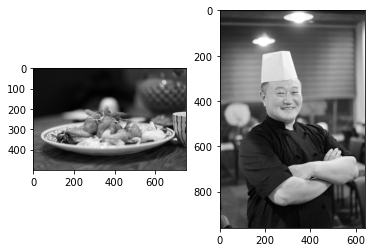

In [6]:
# 사진 확인
fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(food, cmap='gray')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(face, cmap='gray')

plt.show()

In [7]:
os.chdir('../..')  # haarcascade xml 다운로드한 디렉토리로 이동

## 3. haarcascade xml 로드

In [8]:
xml = 'haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(xml)

## 4. 얼굴검출
- 사진 속에 얼굴이 없는 것으로 판단되면 array()
- 사진 속에 얼굴이 있는 것으로 판단되면 array([[x1, y1, w1, h1], [x2, y2, w2, h2], ...])

In [9]:
food_faces = cascade.detectMultiScale(food, scaleFactor = 1.2, minNeighbors=5)
food_faces

()

In [10]:
face_faces = cascade.detectMultiScale(face, scaleFactor = 1.5, minNeighbors= 5)
face_faces

array([[203, 292, 182, 182]])

In [11]:
print('1번째 사진 속 얼굴 수 :', len(food_faces))
print('2번째 사진 속 얼굴 수 :', len(face_faces))

1번째 사진 속 얼굴 수 : 0
2번째 사진 속 얼굴 수 : 1


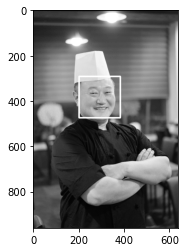

In [12]:
# 검출된 얼굴 확인
if len(face_faces):
    for (x,y,w,h) in face_faces:
        cv2.rectangle(face,(x,y),(x+w,y+h),(255,255,255),5)

plt.imshow(face, cmap='gray')
plt.show()

정상적으로 잘 인식했다.

### 테스트) 이모티콘사진 VS 사람모자이크사진
사진예시로는 경기 광주시의 "구이사 꼬막 요리 전문점 경기광주본점"에 대해 사람들이 남긴 리뷰 사진을 활용하였다.
역시 감사를 표하며 광주에 갈 일이 있다면 여기도 한번 들러보자.

결론부터 말하자면, haarcascade_frontalface_default.xml은 이모티콘과 모자이크된 사람얼굴은 사람얼굴로 인식하지 않는 것으로 보인다.

In [13]:
os.chdir('사진폴더/090701_구이사 꼬막 요리 전문점 경기광주본점')

imoticon_ori = cv2.imread('012.jpg')
mosaic_ori = cv2.imread('017.jpg')

imoticon = cv2.cvtColor(imoticon_ori, cv2.COLOR_BGR2GRAY)
mosaic = cv2.cvtColor(mosaic_ori, cv2.COLOR_BGR2GRAY)

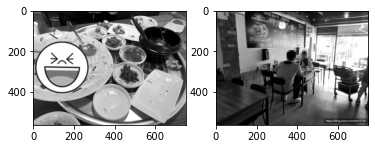

In [14]:
fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(imoticon, cmap='gray')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(mosaic, cmap='gray')

plt.show()

In [15]:
os.chdir('../..')

imoticon_faces = cascade.detectMultiScale(imoticon, scaleFactor = 1.2, minNeighbors=5)
mosaic_faces = cascade.detectMultiScale(mosaic, scaleFactor = 1.2, minNeighbors=5)

In [16]:
print('이모티콘 사진 속 얼굴 수 :', len(imoticon_faces))
print('모자이크 사진 속 얼굴 수 :', len(mosaic_faces))

이모티콘 사진 속 얼굴 수 : 0
모자이크 사진 속 얼굴 수 : 0


haarcascade_frontalface_default.xml은 이모티콘과 모자이크된 사람얼굴은 사람얼굴로 인식하지 않는 것으로 보인다.